# DRUG OVERDOSE PATTERNS WITH MACHINE LEARNING

### Short Introduction:
Drug overdose crisis in North America has hit new heights since the 2020 Coronavirus lockdowns. According to the Centers for Disease Control and Prevention (CDC), more than 100,000 Americans died from drug overdoses between May 2020 and April 2021 - the most ever recorded in a [single year](https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm#drug_specificity). This is a significant 30% increase from 2019 numbers in the US. [Harvard newsletter](https://www.hsph.harvard.edu/news/features/a-crisis-on-top-of-a-crisis-covid-19-and-the-opioid-epidemic/) highlights the current underlying crisis currently overshadowed by the impact of coronavirus pandemic in North America as 2020 is likely to be the deadliest year on record for opioid overdoses. 
Since declaring a health emergency in 2016 in British Columbia, nearly 10,000 people have died from illicit-drug toxicity, a death rate greater than the one associated with COVID-19. Recent monthly data also suggests a rising tide in overdose deaths in same region. 

The objective of this project is to find meaning in the current trends of drug overdoses by analysing the main drivers of these group of illicit drugs and prescription opioids. 
The drug classes used in this project include: 

    1. Benzodiazepines: - A class of psychoactive drugs
    2. Amphetamine (Methamphetamine): - A class of stimulants. 
    3. Opioids (including synthetic opioids such as Fentanyl, and Heroin): - A group of pain-relieving drugs. 
    4. Cocaine - addictive stimulant. 
    5. Cannabis

Data collected from the CDC includes the drug type as both the primary and secondary causes of death in overdoses cases.  
This project also investigates the possible links between drugs most commonly discussed on social media and the currently leading drugs for overdose deaths. As such, a projection could be considered in predicting drugs most likely to cause overdose in the coming year (2022). 

#### 1. Importing Relevant Packages
#### 2. Constructing a Dataframe
#### 3. Data Cleaning
#### 4. Exploratory Data Analysis
#### 5. Regression
#### 6. Prediction models
#### 7. Twitter App Scraping
#### 8. Natural Language Processing
#### 9. Dimensionality Reduction
#### 10. Time Series Forecasting

### Importing Relevant Packages

In [1]:
import re
import tweepy as tw
import nltk
import string
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from yellowbrick.cluster import SilhouetteVisualizer
from xgboost import XGBRegressor
from pmdarima.arima import auto_arima
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olajide\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olajide\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating a dataframe

Data is gotten from CDC Wonder, a system for disseminating Public Health data and information. The Data contains information on drug overdose deaths in the US between 1999 to 2019. The data contains columns on the drug type, age groups, total deaths. 

In [2]:
overdose = pd.read_csv("./data/overdose.csv")

In [3]:
overdose.head(5)

Drug poisoning deaths by intent, age, sex, and drug type, 1999-2019  \
0                                               Year                    
1                                                NaN                    
2                                               2019                    
3                                               2019                    
4                                               2019                    

   Unnamed: 1                                    Unnamed: 2  Unnamed: 3  \
0      Gender                                        Intent         NaN   
1         NaN                                           NaN         NaN   
2  Both sexes  All (preventable, intentional, undetermined)         NaN   
3  Both sexes  All (preventable, intentional, undetermined)         NaN   
4  Both sexes  All (preventable, intentional, undetermined)         NaN   

        Unnamed: 4  Unnamed: 5  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  \
0        Drug type         NaN         NaN  Age Group        NaN         NaN   
1              NaN         NaN         NaN   < 1 year  1-4 years  5-14 years   
2        All drugs         NaN         NaN         50         50          63   
3       Any Opioid         NaN         NaN         19         39          31   
4  Benzodiazepines         NaN         NaN          0          1           4   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0          NaN          NaN          NaN          NaN          NaN   
1  15-24 years  25-34 years  35-44 years  45-54 years  55-64 years   
2        4,777       16,375       16,859       15,083       12,896   
3        3,725       13,309       12,425       10,015        7,978   
4          727        2,297        2,282        2,036        1,788   

   Unnamed: 15  Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  
0          NaN          NaN         NaN         NaN         NaN  
1  65-74 years  75-84 years   85+ years  Not stated    All ages  
2        3,557          672         240           8      70,630  
3        1,977          265          72           5      49,860  
4          458           96          21           1       9,711

### Data Cleaning 

Data cleaning is critical to the success of machine learning in any project. The main aim of this detailed process is to remove errors, incompatible data types and duplicate data to ensure a reliable dataset is constructed, thus improving the quality of the data for analytics and prediction models. For this project, the anomalies and inconsistencies were identified; including missing and incomplete values, structural errors and the data cleaned and streamlined.

In [4]:
overdose = overdose.rename(columns={"Drug poisoning deaths by intent, age, sex, and drug type, 1999-2019": "Year",
                             "Unnamed: 1": "Gender", "Unnamed: 2": "Intent", "Unnamed: 4": "Drug_type",
                             "Unnamed: 7": "1 year", "Unnamed: 8": "1-4 years", "Unnamed: 9": "5-14 years",
                             "Unnamed: 10": "15-24 years", "Unnamed: 11": "25-34 years", "Unnamed: 12": "35-44 years",
                             "Unnamed: 13": "45-54 years", "Unnamed: 14": "55-64 years", "Unnamed: 15": "65-74 years",
                             "Unnamed: 16": "75-84 years", "Unnamed: 17": "85+ years", "Unnamed: 19": "Total_deaths"    
    
})
overdose = overdose.drop(overdose.index[[0, 1]])
overdose = overdose.drop(columns=["Unnamed: 3", "Unnamed: 5", "Unnamed: 6", "Unnamed: 18"])
overdose = overdose.dropna()
overdose = overdose.apply(lambda x: x.str.replace(",", ""))
overdose[["1 year", "1-4 years", "5-14 years", "15-24 years", "25-34 years", "35-44 years",
          "45-54 years", "55-64 years", "65-74 years", "75-84 years", "85+ years", 
          "Total_deaths"]] = overdose[["1 year", "1-4 years", "5-14 years", "15-24 years", "25-34 years", "35-44 years",
          "45-54 years", "55-64 years", "65-74 years", "75-84 years", "85+ years", 
          "Total_deaths"]].apply(pd.to_numeric)
overdose.Year = pd.to_datetime(overdose.Year, format="%Y")
overdose1 = overdose[(overdose.Drug_type != "All drugs") & (overdose.Drug_type != "Any Opioid")]
overdose1 = overdose1[overdose1.Gender != "Both sexes"]
overdose1 = overdose1[overdose1.Intent != "Preventable/accidental"]
overdose1 = overdose1.drop(columns=["Intent"])
overdose1["Drug_type"] = overdose1["Drug_type"].replace({"Opioid subgroup - heroin": "Heroin",
                                                         "Opioid subgroup - methadone": "Methadone",
                                                         "Opioid subgroup – including fentanyl": "Fentanyl",
                                                         "Opioid subgroup – including oxycodone and hydrocodone": "Oxycodone",
                                                         "Psychostimulants – incl. methamphetamine": "Methamphetamine"                                                        
                                                        })
overdose1.reset_index(drop=True, inplace=True)

### Exploratory Data Analysis

In [5]:
overdose1.head(4)

Year  Gender        Drug_type  1 year  1-4 years  5-14 years  \
0 2019-01-01  Female  Benzodiazepines       0          1           3   
1 2019-01-01  Female         Cannabis       0          0           1   
2 2019-01-01  Female          Cocaine       1          0           2   
3 2019-01-01  Female           Heroin       0          1           1   

   15-24 years  25-34 years  35-44 years  45-54 years  55-64 years  \
0          208          750          872          968          880   
1           33           47           65           53           26   
2          236         1044         1083         1085          760   
3          280         1085          852          672          526   

   65-74 years  75-84 years  85+ years  Total_deaths  
0          232           57         15          3986  
1            3            0          0           228  
2          119            4          1          4336  
3           97            4          1          3520

In [6]:
drug_type = overdose1.Drug_type.unique()
drug_type

array(['Benzodiazepines', 'Cannabis', 'Cocaine', 'Heroin', 'Methadone',
       'Fentanyl', 'Oxycodone', 'Methamphetamine'], dtype=object)

In [6]:
fig = go.Figure(data=[
    go.Bar(name='1 Year', x=overdose1["Drug_type"], y=overdose1["1 year"]),
    go.Bar(name='1-4 Years', x=overdose1["Drug_type"], y=overdose1["1-4 years"]),
    go.Bar(name='5-14 Years', x=overdose1["Drug_type"], y=overdose1["5-14 years"]),
    go.Bar(name='15-24 Years', x=overdose1["Drug_type"], y=overdose1["15-24 years"]),
    go.Bar(name='25-34 Years', x=overdose1["Drug_type"], y=overdose1["25-34 years"]),
    go.Bar(name='35-44 Years', x=overdose1["Drug_type"], y=overdose1["35-44 years"]),
    go.Bar(name='45-54 Years', x=overdose1["Drug_type"], y=overdose1["45-54 years"]),
    go.Bar(name='55-64 Years', x=overdose1["Drug_type"], y=overdose1["55-64 years"]),
    go.Bar(name='65-74 Years', x=overdose1["Drug_type"], y=overdose1["65-74 years"]),
    go.Bar(name='75-84 Years', x=overdose1["Drug_type"], y=overdose1["75-84 years"]),
    go.Bar(name='85+ years', x=overdose1["Drug_type"], y=overdose1["85+ years"])
    
])
# Change the bar mode
fig.update_layout(barmode='group',autosize=False,
                  width=1200,
                  height=1000,
                  xaxis_title="Drug Types",
                  yaxis_title="Deaths per Age Groups",
                  title="Drug Overdose Deaths per Age Groups")
fig.show()

Oxycodone deaths in the 45-54 year age group has the highest number of casualties over the 20-year period, followed by fentanyl deaths in 25-34 year age group. Cannabis shows the least number of total deaths recorded across all age groups. 

In [7]:

df = px.data.tips()
fig = px.bar(overdose1, x='Gender', y='Total_deaths', 
             color="Gender", title="Recorded Drug Overdose Deaths among Genders")

fig.show()

The above bar plot shows the total deaths recorded in the US between 1999 to 2019, indicating the wide margin of overdose occurrences between genders. As seen above, there are more male casualties of drug overdose in said timeframe. 

In [8]:
df = px.data.tips()
fig = px.bar(overdose1, x='Drug_type', y='Total_deaths', 
             color="Gender", title="Recorded Drug Overdose Deaths among Genders on Each Drug")
fig.update_layout(barmode="group")
fig.show()

As demonstrated in the plot above, analysis indicates Oxycodone overdose has caused the most casualties in both male and female cases over two decades, with fentanyl following closely. Cocaine, Fentanyl and Oxycodone all exceed the 100,000-death mark for male overdose deaths. Cannabis, however has, by a significant margin, the lowest recorded numbers. 

In [9]:
df = px.data.tips()
fig = px.bar(overdose1, x='Drug_type', y='Total_deaths', 
             color="Drug_type", title="Total Recorded Drug Overdose Deaths")
fig.show()

The above bar plot mirrors the preceding plot, with Oxycodone clearly leading on drug-related deaths and Cannabis trailing well behind compared to other listed drugs.

#### Drug Overdose Trend from 1999-2019

In [11]:
popular_drug = overdose1.pivot_table(index="Drug_type", columns="Year", values="Total_deaths", aggfunc=np.sum).fillna(0)
popular_drug1 = popular_drug/popular_drug.sum() * 100
popular_drug1["total"] = popular_drug1.sum(axis=1)
popular_drug2 = popular_drug1.sort_values(by="total", ascending=False).drop("total", axis=1)
popular_drug3 = popular_drug2.T

In [12]:
popular_drug3.head()

Drug_type            Oxycodone    Cocaine  Benzodiazepines     Heroin  \
Year                                                                    
1999-01-01 00:00:00  23.369889  32.491711         9.648899  16.662416   
2000-01-01 00:00:00  24.334696  29.565362        10.828397  15.366647   
2001-01-01 00:00:00  25.397868  27.982187        11.636735  12.987297   
2002-01-01 00:00:00  24.850872  25.880698        11.378728  11.755768   
2003-01-01 00:00:00  24.327702  25.987204        11.236629  10.396881   

Drug_type            Fentanyl  Methadone  Methamphetamine  Cannabis  
Year                                                                 
1999-01-01 00:00:00  6.205900   6.664966         4.650174  0.306044  
2000-01-01 00:00:00  6.523734   8.225578         4.821890  0.333695  
2001-01-01 00:00:00  6.986421  10.629289         4.110089  0.270112  
2002-01-01 00:00:00  7.287563  13.269555         5.295442  0.281373  
2003-01-01 00:00:00  6.997901  14.855543         5.893232  0.304909

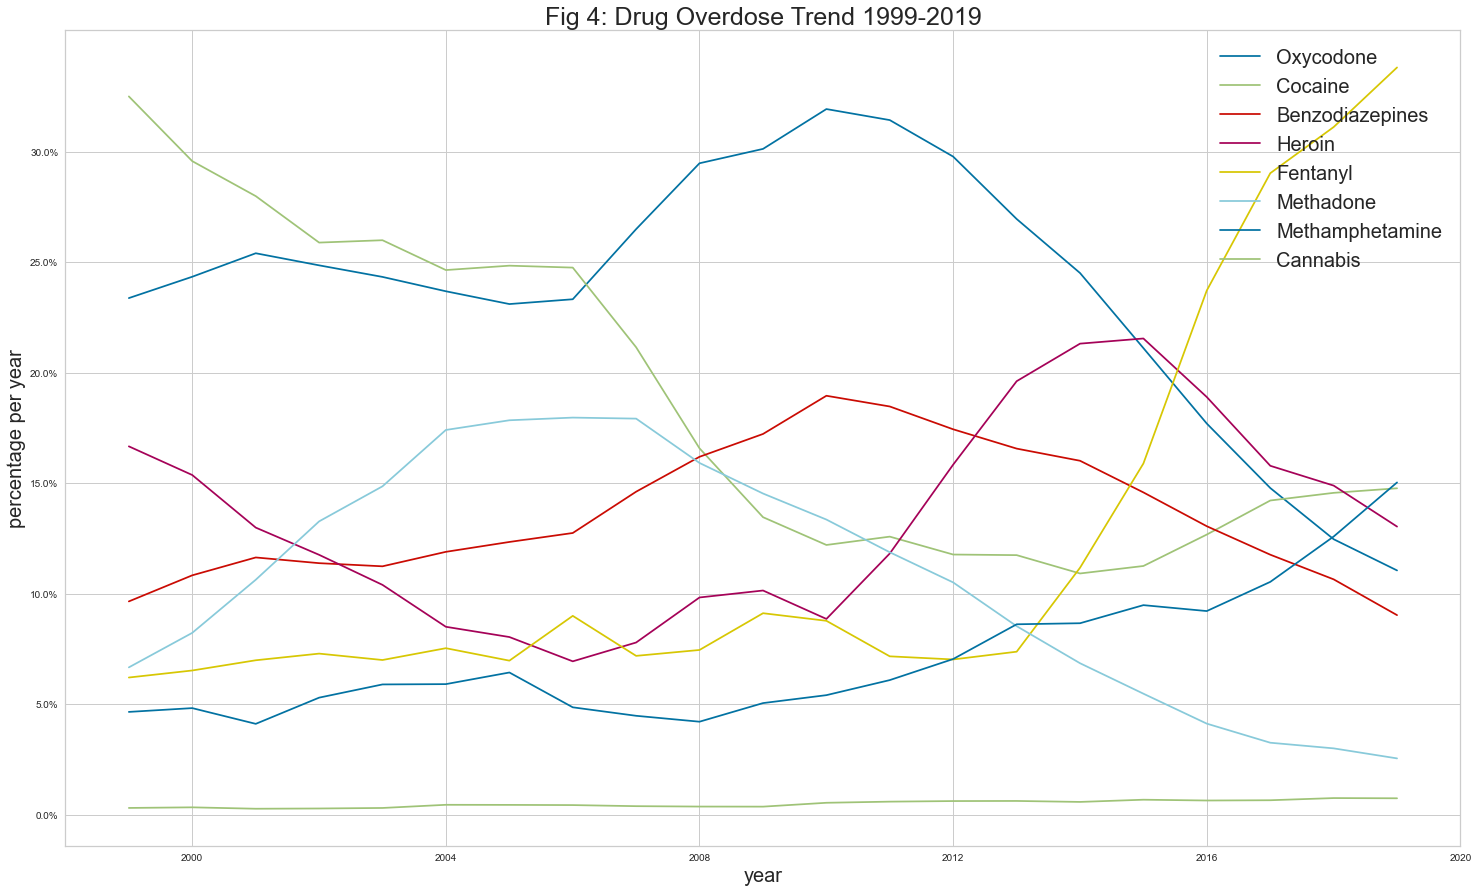

In [13]:
plt.rcParams["figure.figsize"] = (25,15)

for drug in popular_drug3.columns.tolist():
    plt.plot(popular_drug3.index, popular_drug3[drug], label=drug)
yticks_labels = ["{}%".format(i) for i in np.arange(0, 35, 5.)]
plt.yticks(np.arange(0, 35, 5.), yticks_labels)

plt.legend(fontsize=20)
plt.xlabel("year", fontsize=20)
plt.ylabel("percentage per year", fontsize=20)
plt.title("Fig 4: Drug Overdose Trend 1999-2019", fontsize=25)
plt.show()

The above plot is percentage of drug overdose deaths to a trend from 1999-2019 on specific most commonly used drugs in the US. The American society represents a microcosm of the stereotypical state of drug overdose practice in the Western world. 

For clarity, the opioids subgroups are split from their drug class into specific drug types as each opioid has a different overdose percentage especially due to the time release of the drugs into the blood stream. 
As clearly demonstrated, the rate of drug overdose deaths involving commonly used synthetic opioids such as fentanyl has steadily increased since 2014 and is fast on the rise into the new decade. The percentage jump from a mean 7% deaths per year pre-2012 to more than 30% in 2019 shows it has become the archetypal overdose drug. 

The rate of Cocaine has dropped by more than half since 1999 from the mid-30 percentage drug responsible for overdose to around 11% in 2012, however stabilizing at 15% into the new decade. This is likely due to drug enforcement initiatives ensuring usage is restricted. 

The rate of drug overdose deaths involving natural and semisynthetic opioids, which includes drugs such as oxycodone increased 25% of drug overdose deaths to a peak of 35% between 2008 and 2012, coinciding with the OxyContin-Purdue Pharma crisis in America. 

Heroin usage peaked in 2014, responsible for a little above 20% of drug overdose in America and Methamphetamine(a psychostimulant) has been on a steady rise since 2008, reaching a peak 15% of deaths in 2019. 

### Ordinary Least Squared - Linear Regression

Ordinary Least Squares regression was used below to estimate the coefficients of linear regression equations which describe the relationship between the drug types, age groups and gender, and the total deaths (which is the dependent variable). Least squares stands for the minimum squares error (SSE).
Essentially, the goal of this regression analysis is to model the expected value of a dependent variable (Total deaths), y in terms of the value of the vector of independent variables, X. 


In [10]:
y = overdose1["Total_deaths"]
X = overdose1.drop(columns=["Total_deaths"])

X[["Benzodiazepenes", "Cannabis", "Cocaine", "Heroin", "Methadone", 
   "Fentanyl", "Oxycodone", "Methamphetamine"]] = (pd.get_dummies(X["Drug_type"]))

X["Gender"] = pd.get_dummies(X["Gender"], drop_first=True)

X = X.drop(columns=["Drug_type"])

X = X.drop(columns=["Year"])

In [11]:
est = sm.OLS(y, sm.add_constant(X)).fit(cov_type="HC2")
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_deaths   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.955e+08
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        07:51:53   Log-Likelihood:                -402.75
No. Observations:                 336   AIC:                             845.5
Df Residuals:                     316   BIC:                             921.8
Df Model:                          19                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1112      0.136     -0.820      0.412      -0.377       0.155
Gender              0.3649      0.126      2.894      0.004       0.118       0.612
1 year              0.9162      0.052     17.467      0.000       0.813       1.019
1-4 years           0.9572      0.045     21.166      0.000       0.869       1.046
5-14 years          0.9954      0.027     36.222      0.000       0.942       1.049
15-24 years         0.9977      0.001    784.689      0.000       0.995       1.000
25-34 years         0.9999      0.001   1092.559      0.000       0.998       1.002
35-44 years         1.0025      0.001    955.211      0.000       1.000       1.005
45-54 years         0.9996      0.001   1290.730      0.000       0.998       1.001
55-64 years         1.0004      0.001    756.746      0.000       0.998       1.003
65-74 years         0.9924      0.005    187.856      0.000       0.982       1.003
75-84 years         1.0259      0.015     70.045      0.000       0.997       1.055
85+ years           0.9898      0.017     58.430      0.000       0.957       1.023
Benzodiazepenes    -0.5635      0.157     -3.590      0.000      -0.871      -0.256
Cannabis           -0.0710      0.145     -0.490      0.624      -0.355       0.213
Cocaine             0.4458      0.229      1.947      0.051      -0.003       0.894
Heroin             -0.2492      0.105     -2.372      0.018      -0.455      -0.043
Methadone           0.0891      0.174      0.512      0.608      -0.252       0.430
Fentanyl            0.0888      0.139      0.639      0.523      -0.183       0.361
Oxycodone           0.0490      0.122      0.403      0.687      -0.189       0.287
Methamphetamine     0.0998      0.348      0.287      0.774      -0.582       0.781
==============================================================================
Omnibus:                       83.405   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.531
Skew:                           0.947   Prob(JB):                     2.88e-87
Kurtosis:                       7.988   Cond. No.                     1.59e+19
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 4.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Xduo signifies the quadratic version of X, ensuring a better fit for the model, taking to account that the p-value of the vector of variables respond better. The explanatory variables (that is, X) resulting from this expansion of the "baseline" variables are known as higher-degree terms.

In [12]:
Xduo = np.square(X)
estd = sm.OLS(y,Xduo).fit(cov_type="HC2")
estd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_deaths   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                nan
Time:                        07:51:54   Log-Likelihood:                -2710.2
No. Observations:                 336   AIC:                             5460.
Df Residuals:                     316   BIC:                             5537.
Df Model:                          19                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender            488.2950    121.643      4.014      0.000     249.879     726.711
1 year             43.2823     11.279      3.837      0.000      21.175      65.389
1-4 years          -2.1986      4.135     -0.532      0.595     -10.303       5.906
5-14 years         -3.3150      3.093     -1.072      0.284      -9.376       2.746
15-24 years         0.0039      0.002      2.573      0.010       0.001       0.007
25-34 years         0.0002      0.000      0.756      0.450      -0.000       0.001
35-44 years        -0.0012      0.000     -2.912      0.004      -0.002      -0.000
45-54 years         0.0017      0.000      4.440      0.000       0.001       0.002
55-64 years         0.0003      0.001      0.324      0.746      -0.001       0.002
65-74 years         0.0138      0.016      0.839      0.401      -0.018       0.046
75-84 years         0.0096      0.175      0.055      0.956      -0.332       0.352
85+ years          -0.4095      0.593     -0.690      0.490      -1.572       0.753
Benzodiazepenes  1437.4082    148.026      9.710      0.000    1147.282    1727.534
Cannabis         -123.3958     69.121     -1.785      0.074    -258.870      12.078
Cocaine          1590.0744    167.239      9.508      0.000    1262.291    1917.858
Heroin            968.0687    162.668      5.951      0.000     649.246    1286.891
Methadone        1278.8084    194.486      6.575      0.000     897.623    1659.993
Fentanyl          929.7163    102.350      9.084      0.000     729.114    1130.319
Oxycodone         610.2559    134.364      4.542      0.000     346.907     873.605
Methamphetamine  1195.7761    211.622      5.651      0.000     781.005    1610.547
==============================================================================
Omnibus:                       68.586   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.130
Skew:                           0.890   Prob(JB):                     4.30e-48
Kurtosis:                       6.523   Cond. No.                     4.17e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $P > |t|$ column is a **t-test** result for the null hypothesis on this coefficient. We see in the squared regression, most coefficients pass the t-test, however, those still failing the test hypothesis are removed to ensure a better fit for the model.

In [13]:
Xduo = Xduo.drop(["1-4 years", "5-14 years", "25-34 years", "55-64 years", "65-74 years", 
                  "75-84 years", "85+ years", "Cannabis"], axis=1)

In [14]:
estd = sm.OLS(y,Xduo).fit(cov_type="HC2")
estd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Total_deaths   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              376.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                   4.00e-182
Time:                        07:51:58   Log-Likelihood:                         -2745.6
No. Observations:                 336   AIC:                                      5515.
Df Residuals:                     324   BIC:                                      5561.
Df Model:                          12                                                  
Covariance Type:                  HC2                                                  
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender            436.8430     97.390      4.485      0.000     245.961     627.725
1 year             37.6562      7.885      4.776      0.000      22.202      53.110
15-24 years         0.0029      0.001      3.203      0.001       0.001       0.005
35-44 years        -0.0008      0.000     -4.266      0.000      -0.001      -0.000
45-54 years         0.0020      0.000     10.901      0.000       0.002       0.002
Benzodiazepenes  1405.7560    147.946      9.502      0.000    1115.788    1695.724
Cocaine          1326.8297    129.401     10.254      0.000    1073.208    1580.452
Heroin            900.0529    157.406      5.718      0.000     591.544    1208.562
Methadone        1456.8940    240.633      6.054      0.000     985.262    1928.526
Fentanyl          840.8914     75.970     11.069      0.000     691.993     989.790
Oxycodone         592.5957    124.384      4.764      0.000     348.808     836.383
Methamphetamine   778.4319    222.384      3.500      0.000     342.568    1214.296
==============================================================================
Omnibus:                       82.024   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.463
Skew:                           0.929   Prob(JB):                     5.99e-86
Kurtosis:                       7.958   Cond. No.                     2.11e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
[3] The condition number is large, 2.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This OLS model completed above shows a close score between the R-squared and the adjusted R-squared, indicating the model fit is not data specific, has not lost extrapolation and it has little nonsense variations compared to real world data interpretation.


As observed from the OLS and the above heatmaps, there is a strong correlation between the factors of age and drug usage to deaths observed both in age categories and with the total deaths recorded over the years

### Prediction Models

First step is creating testing and training samples and subsequently setting select models and parameters as observed below:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xduo,y, test_size=0.2, random_state=np.random)

### Linear Regression Prediction

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RSME = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'The value of Root Squared Mean Error is :{RSME}')
R2_score = r2_score(y_test, y_pred)
print(f'The value of R-Squared is :{R2_score*100}%')


The value of Root Squared Mean Error is :706.5687762766155
The value of R-Squared is :89.66692958795825%


In [20]:
Predictions = model.predict(X_train)
Overdose_Deaths_LR = pd.DataFrame({
    "Year": overdose1["Year"],
    "Drug Type": overdose1["Drug_type"],
    "Recorded Deaths": overdose1["Total_deaths"]
    
})
Overdose_Deaths_LR["Predicted Deaths"] = pd.Series(Predictions)
Overdose_Deaths_LR.head(8)

Year        Drug Type  Recorded Deaths  Predicted Deaths
0 2019-01-01  Benzodiazepines             3986       3332.806571
1 2019-01-01         Cannabis              228       3017.151096
2 2019-01-01          Cocaine             4336        856.227686
3 2019-01-01           Heroin             3520       1901.649957
4 2019-01-01        Methadone             1140       6569.564686
5 2019-01-01         Fentanyl            10076       6108.820937
6 2019-01-01        Oxycodone             4842       1423.636019
7 2019-01-01  Methamphetamine             4733       3540.558724

### Gaussian Naive Bayes Prediction

In [21]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
RSME = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'The value of Root Squared Mean Error for a Guassian Naive Bayes is :{RSME}')
R2_score = r2_score(y_test, y_pred)
print(f'The value of R-Squared for a Guassian Naive Bayes is :{R2_score*100}%')

The value of Root Squared Mean Error for a Guassian Naive Bayes is :1276.462039480726
The value of R-Squared for a Guassian Naive Bayes is :66.27621490741721%


In [22]:
Predictions = gaussian.predict(Xduo)
Overdose_Deaths_NB = pd.DataFrame({
    "Year": overdose1["Year"],
    "Drug Type": overdose1["Drug_type"],
    "Recorded Deaths": overdose1["Total_deaths"]
    
})
Overdose_Deaths_NB["Predicted Deaths"] = pd.Series(Predictions)
Overdose_Deaths_NB.head(8)

Year        Drug Type  Recorded Deaths  Predicted Deaths
0 2019-01-01  Benzodiazepines             3986              3986
1 2019-01-01         Cannabis              228              1322
2 2019-01-01          Cocaine             4336              4336
3 2019-01-01           Heroin             3520              3520
4 2019-01-01        Methadone             1140              1140
5 2019-01-01         Fentanyl            10076             10076
6 2019-01-01        Oxycodone             4842              4842
7 2019-01-01  Methamphetamine             4733              4733

### Extreme Gradient Boosting Prediction

In [23]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
RSME = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'The value of Root Squared Mean Error is :{RSME}')
R2_score = r2_score(y_test, y_pred)
print(f'The value of R-Squared for XGBoost is :{R2_score*100}%')

The value of Root Squared Mean Error is :265.6609082807737
The value of R-Squared for XGBoost is :98.53925028071306%


In [24]:
Predictions = XGB.predict(Xduo)
Overdose_Deaths_XGB = pd.DataFrame({
    "Year": overdose1["Year"],
    "Drug Type": overdose1["Drug_type"],
    "Recorded Deaths": overdose1["Total_deaths"]
    
})
Overdose_Deaths_XGB["Predicted Deaths"] = pd.Series(Predictions)
Overdose_Deaths_XGB.head(8)

Year        Drug Type  Recorded Deaths  Predicted Deaths
0 2019-01-01  Benzodiazepines             3986       3979.252930
1 2019-01-01         Cannabis              228        274.028992
2 2019-01-01          Cocaine             4336       4333.014160
3 2019-01-01           Heroin             3520       3521.411621
4 2019-01-01        Methadone             1140       1135.391235
5 2019-01-01         Fentanyl            10076      10075.125000
6 2019-01-01        Oxycodone             4842       4839.894043
7 2019-01-01  Methamphetamine             4733       4735.061523

In [25]:

fig = go.Figure(data=[
    go.Bar(name='Recorded Drug Overdose', x=Overdose_Deaths_XGB["Drug Type"], y=Overdose_Deaths_XGB["Recorded Deaths"]),
    go.Bar(name='Predicted Drug Overdose', x=Overdose_Deaths_XGB["Drug Type"], y=Overdose_Deaths_XGB["Predicted Deaths"])
    
])
# Change the bar mode
fig.update_layout(barmode='group',autosize=False,
                  width=1100,
                  height=800,
                  xaxis_title="Drug Types",
                  yaxis_title="Drug Overdose Deaths",
                  title="XGBoost Prediction Model")
fig.show()

Extreme Gradient Boosting performs closest in predicting the total number of deaths caused by the selected drugs per year. It is both highly effective and computationally efficient, and as demonstrated, it is more efficient than other implementations considered in predicting overdose deaths per drug. From the graph illustrated above, predicted overdose deaths are higher in all drug groups but cannabis, which showed a lower value compared to the recorded data.

Furthermore, this model consistently shows, compared to the other models used, that the factors of age and specific drugs directly contribute to deaths seen per year. As the value of R-squared is closest to 100%, this means the XGB model explains all the variation in the response variable around its mean.

### Tweets Web Scraping for Most Popular Drugs

Drugs are sold on both dark web services and on social media (Twitter), first gaining traction through the Silk Road site used for a motley of things, particularly the sale of illegal and prescription drugs. Silk road peaked between 2011 and 2014 when it was finally shutdown by the FBI (the US govt later seized $1 Billion in Bitcoin) and from its popularity, social media has been used for hand-to-hand transactions and drug proliferation. Although social media is now a popular context for drug trade, research on this topic is still in its very early stages. While the dark web is still more popular for direct drug transactions due to IP anonymity, contacts and conversations around drugs are being had on social media. In analysing the drugs most likely to have the highest overdose deaths in the coming year(s), the popularity of said drugs on social media could be used as guage.

This project, therefore attempts to find a theme between the commonly discussed drugs and drug overdose rates. 


A function is written to scrape specific words from twitter using api. Text scraped targets the drug names including the compound, brand and street names of these drugs. Some street names are excluded due to ambiguity. The names are concatenated to form single dataframe and analysed.
Some of the brand and street names used per drug class are as follows:

    1. Oxycodone class: OxyContin, percs, percocet, vicodin
    2. Benzodiazepines class: Xanax, Benzos, Xannies, Valium
    3. Amphetamine class: Meth, Crystal Meth, Scooby, MDMA, Molly
    4. Cocaine: Crack, Cocaine
    5. Fentanyl
    6. Heroin 
    
    

#### Twitter Scraping using API

In [27]:
# accesstoken = 'numbers-xxxxxxxxxxxxxx'
# accesstokensecret = 'xxxxxxxxxxxxxxxxxxxxxxx'
# apikey = 'xxxxxxxxxxxxxxxxxxx'
# apisecretkey = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [28]:
def scraper(word):
    auth = tw.OAuthHandler(apikey, apisecretkey) 
    auth.set_access_token(accesstoken,accesstokensecret)

    api = tw.API(auth,wait_on_rate_limit=True)

    search_word = word
    date_since = '2021-01-01'

    tweets = tw.Cursor(api.search_tweets, q = search_word, lang ='en',since = date_since).items(1000)


    tweet_details = [[tweet.text,tweet.user.screen_name,tweet.user.location]for tweet in tweets]


    word = pd.DataFrame(data = tweet_details,columns=['text','user','location'])
    pd.set_option('max_colwidth',800)
    return word

In [29]:
# vicodin = pd.DataFrame(scraper("vicodin"))
# vicodin.info()

# percocet = pd.DataFrame(scraper("percocet"))
# print(percocet.info())

# percs = pd.DataFrame(scraper("percs"))
# print(percs.info())

# OxyContin = pd.DataFrame(scraper("OxyContin"))
# print(OxyContin.info())

# Fentanyl = pd.DataFrame(scraper("Fentanyl"))
# print(Fentanyl.info())

# Xanax = pd.DataFrame(scraper("Xanax"))
# print(Xanax.info())

# Benzos = pd.DataFrame(scraper("Benzos"))
# print(Benzos.info())

# Xannies = pd.DataFrame(scraper("Xannies"))
# print(Xannies.info())

# Valium = pd.DataFrame(scraper("Valium"))
# print(Valium.info())

# Meth = pd.DataFrame(scraper("Meth"))
# print(Meth.info())

# Crystal_Meth = pd.DataFrame(scraper("Crystal Meth"))
# print(Crystal_Meth.info())

# Scooby = pd.DataFrame(scraper("Scooby Snax"))
# print(Scooby.info())

# MDMA = pd.DataFrame(scraper("MDMA"))
# print(MDMA.info())

# Molly = pd.DataFrame(scraper("#Molly Meth"))
# print(Molly.info())

# Heroin = pd.DataFrame(scraper("Heroin"))
# print(Heroin.info())

# Cocaine = pd.DataFrame(scraper("Cocaine"))
# print(Cocaine.info())

# Crack = pd.DataFrame(scraper("Crack Cocaine"))
# print(Crack.info())

In [30]:
# Oxycodone =  pd.concat([OxyContin, percs, percocet, vicodin], ignore_index=True, sort=False)
# Benzodiazepines =  pd.concat([Xanax, Benzos, Xannies, Valium], ignore_index=True, sort=False)
# Methamphetamine =  pd.concat([Meth, Crystal_Meth, Scooby, MDMA, Molly], ignore_index=True, sort=False)
# Cocaine =  pd.concat([Crack, Cocaine], ignore_index=True, sort=False)
# df = pd.concat([Methamphetamine, Cocaine, Heroin, Benzodiazepines, Fentanyl, Oxycodone], ignore_index=True, sort=False)
# df.head(5)
# df.to_csv(r'.\data\Drug_Overdose.csv')

In [31]:
df = pd.read_csv(".\data\Drug_Overdose.csv")
df.head(5)

Unnamed: 0                                               text  \
0           0  RT @samquinones7: A woman from rural New Mexic...   
1           1  @CountDankulaTV Well, we do have Caffeine(form...   
2           2                  And by the way, which one is Pink   
3           3  The Arizona Department of Public Safety (DPS) ...   
4           4  @claire_goforth @gravemorgan @Claudio_Report A...   

             user               location  
0         jbm1215                    NaN  
1        Azmolial             Behind you  
2      blue_meth_              Neverland  
3  YSJamesGilbert               Yuma, AZ  
4        GawdPopo  Profile pic is not me

### Data Cleaning

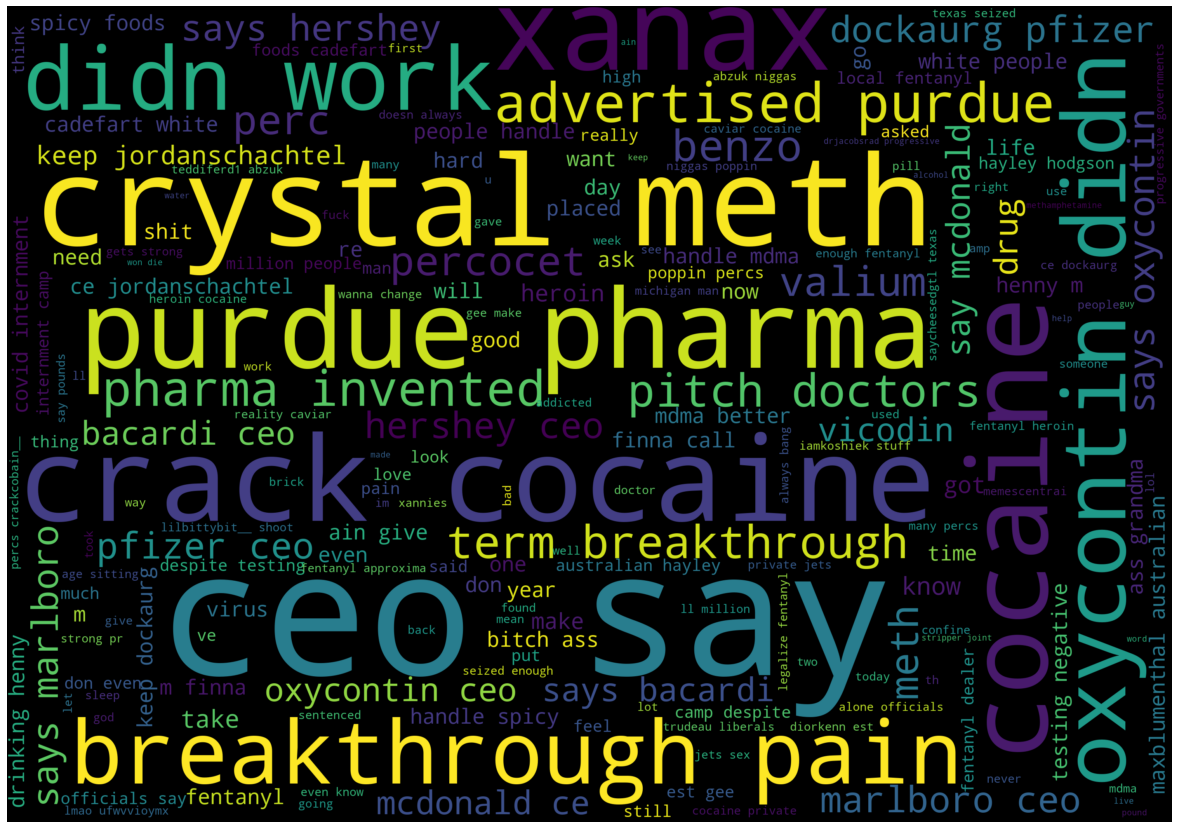

In [32]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def clearout(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+',"",text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'#',"",text)
    text = re.sub(r'RT[\s]+',"",text)
    text = re.sub(r'https[\s]+',"",text)
    text = re.sub(r'co[\s]+',"",text)
    text = re.sub(r'https:\/\/\S+',"", text)
    text = text.lower()
    return text
    
    

df["Text"] = df["text"].apply(lambda x : remove_url(x))
df["Text"] = df["text"].apply(lambda x : remove_punct(x))
df["Text"] = df["text"].apply(lambda x : remove_emoji(x))
df["Text"] = df["text"].apply(lambda x : decontraction(x))
df["Text"] = df["text"].apply(lambda x : seperate_alphanumeric(x))
df["Text"] = df["text"].apply(lambda x : unique_char(cont_rep_char,x))
df["Text"] = df["text"].apply(lambda x : clearout(x))

#print(df.head(5))

allwords = " ".join([tweets for tweets in df['Text']])
wordCloud = WordCloud(background_color = 'black', 
                      width = 1000 , height = 700 , random_state = 21, max_font_size= 150, scale=3).generate(allwords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
STOP_WORDS = stopwords.words()

def cleaning(text):
    """
    Convert to lowercase.
    Remove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = " ".join([str(text) for text in text.split(" ") if str(text) not in ["seized","coronavirus", "the", 
                                                                    "is", "covid", "placed", "despite", 
                                                                    "testing", "negative", "pharma", "pitch", "term",
                                                                                "ceo", "bacardi", "say", "pfizer", "says",
                                                                                "work",
                                                                    "camp", "internment", "virus", "tequila", "shots",
                                                                               "like", "two", "get", "new", "know", "gon"]])
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # Removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

if __name__ == "__main__":
    max_rows = 'None' # 'None' to read whole file

    dt = df['Text'].apply(cleaning)

dt = df['Text'].apply(cleaning)

word_count = Counter(" ".join(dt).split()).most_common(13)

word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency

Word  Frequency
0     cocaine       1848
1        meth       1519
2    fentanyl       1095
3   oxycontin       1010
4       percs        995
5       crack        926
6       xanax        866
7     crystal        832
8      heroin        827
9        pain        768
10   percocet        709
11     benzos        683
12       mdma        662

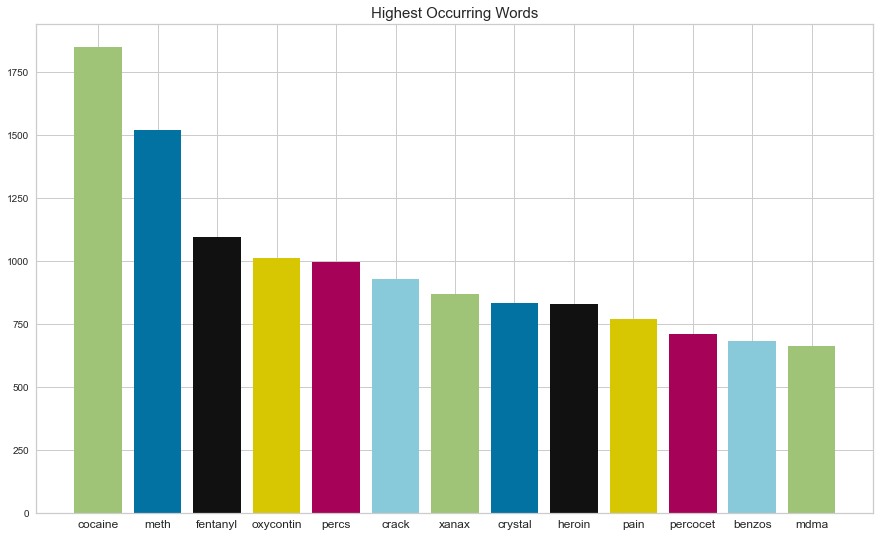

In [34]:
my_colors = 'gbkymc'
plt.figure(figsize=(15,9))
plt.xticks(fontsize=12)
plt.bar(word_frequency.Word, word_frequency.Frequency, color=list('gbkymc'))
plt.title("Highest Occurring Words", fontsize=15);

#### Feature Extraction and Dimension Reductionality
CountVectorizer is used here to convert the collection of words from the tweets into a vector of token counts in order to use the textual data. It is used here due to its highly flexible feature representation module for text. 
These words are then encoded as integers or floats for use as inputs in the machine learning algorithm



In [35]:
cv = CountVectorizer(analyzer="word", ngram_range=(2, 2))
D = cv.fit_transform(df["Text"])
D

<13941x71882 sparse matrix of type '<class 'numpy.int64'>'
	with 200165 stored elements in Compressed Sparse Row format>

In [36]:
pca = PCA(n_components=4)
D_pca = pca.fit_transform(D.toarray())

#### Clustering Approaches:
Birch, Agglomerative and K-Means clustering approaches are considered to identify popular drug "clusters" in tweets collected. The purpose of this analysis is to identify the popularity of these drugs and the words they evoke in the conversations had on Twitter, that is, to recognize what is most associated with the select drugs  



#### BIRCH Clustering

In [37]:


B = Birch(n_clusters=13).fit(D_pca)
clusters = B.fit_predict(D_pca)

tsne = TSNE(n_components=3, verbose=1)
visual_B = tsne.fit_transform(D_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13941 samples in 0.033s...
[t-SNE] Computed neighbors for 13941 samples in 0.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13941
[t-SNE] Computed conditional probabilities for sample 2000 / 13941
[t-SNE] Computed conditional probabilities for sample 3000 / 13941
[t-SNE] Computed conditional probabilities for sample 4000 / 13941
[t-SNE] Computed conditional probabilities for sample 5000 / 13941
[t-SNE] Computed conditional probabilities for sample 6000 / 13941
[t-SNE] Computed conditional probabilities for sample 7000 / 13941
[t-SNE] Computed conditional probabilities for sample 8000 / 13941
[t-SNE] Computed conditional probabilities for sample 9000 / 13941
[t-SNE] Computed conditional probabilities for sample 10000 / 13941
[t-SNE] Computed conditional probabilities for sample 11000 / 13941
[t-SNE] Computed conditional probabilities for sample 12000 / 13941
[t-SNE] Computed conditional probabilities for sam

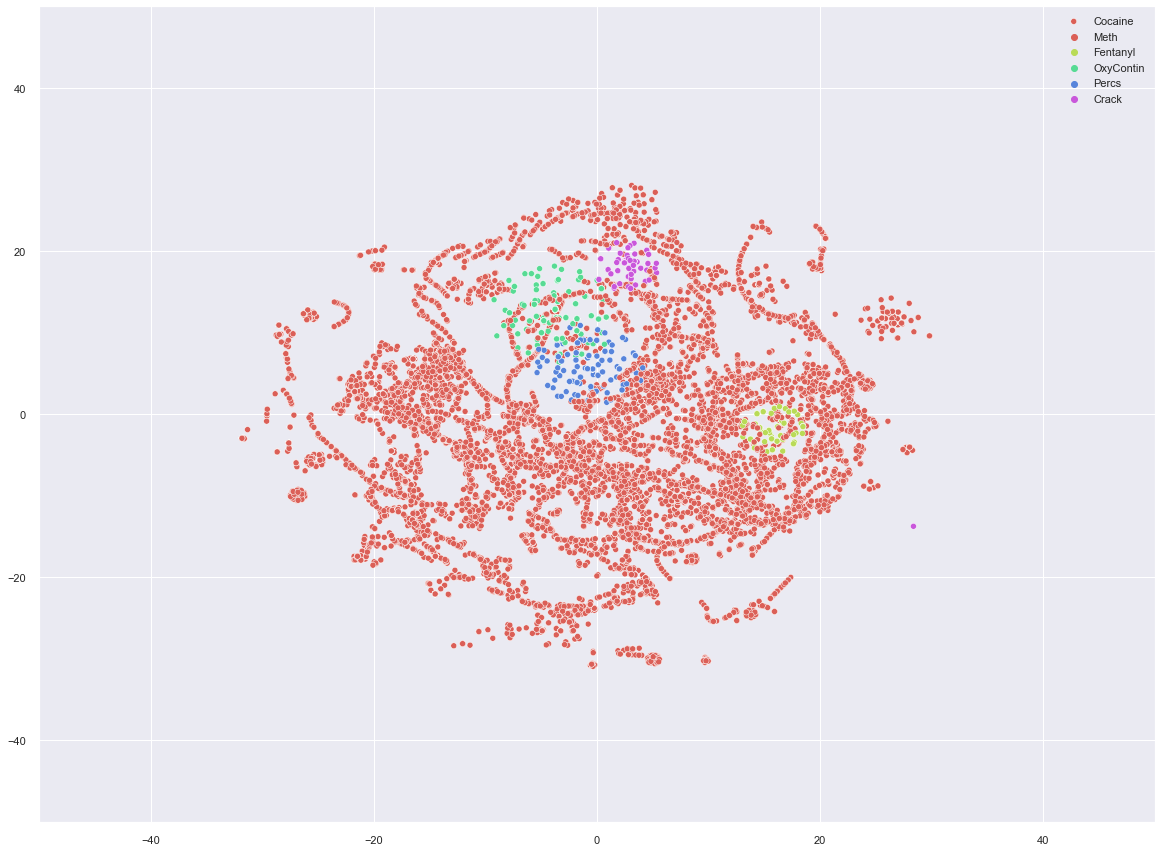

In [43]:
my_palette = sns.hls_palette(n_colors=5)
sns.set_theme()
sns.set(rc={'figure.figsize':(20, 15)})
plt.xlim(-50,50)
plt.ylim(-50,50)
sns.scatterplot(x=visual_B[:,0], y=visual_B[:,1], palette=my_palette, hue=clusters)
plt.legend(labels=["Cocaine", "Meth", "Fentanyl","OxyContin",
                   "Percs", "Crack", "Xanax", "Crystal", "Heroin", "Pain",
                  "Percocet", "Benzos","MDMA"                 
                         
                  ])

BIRCH (balanced iterative reducing and clustering using hierarchies) is used to perform hierarchical clustering. The advantage here is its ability to incrementally and dynamically cluster multi-dimensional metric data points and ensure the best quality clustering. For this project, the highest frequent words are considered as clusters. Cocaine and Meth are spread across from the center. Pain is associated with the text gotten from tweets and is found in clusters across, closely joined with tweets on Benzos and MDMA, as well as cocaine. 

#### Agglomerative Clustering

In [44]:
agg = AgglomerativeClustering(n_clusters=13).fit(D_pca)
clusters = agg.fit_predict(D_pca)
tsne = TSNE(n_components=3, verbose=1)
visual = tsne.fit_transform(D_pca)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13941 samples in 0.016s...
[t-SNE] Computed neighbors for 13941 samples in 0.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13941
[t-SNE] Computed conditional probabilities for sample 2000 / 13941
[t-SNE] Computed conditional probabilities for sample 3000 / 13941
[t-SNE] Computed conditional probabilities for sample 4000 / 13941
[t-SNE] Computed conditional probabilities for sample 5000 / 13941
[t-SNE] Computed conditional probabilities for sample 6000 / 13941
[t-SNE] Computed conditional probabilities for sample 7000 / 13941
[t-SNE] Computed conditional probabilities for sample 8000 / 13941
[t-SNE] Computed conditional probabilities for sample 9000 / 13941
[t-SNE] Computed conditional probabilities for sample 10000 / 13941
[t-SNE] Computed conditional probabilities for sample 11000 / 13941
[t-SNE] Computed conditional probabilities for sample 12000 / 13941
[t-SNE] Computed conditional probabilities for sam

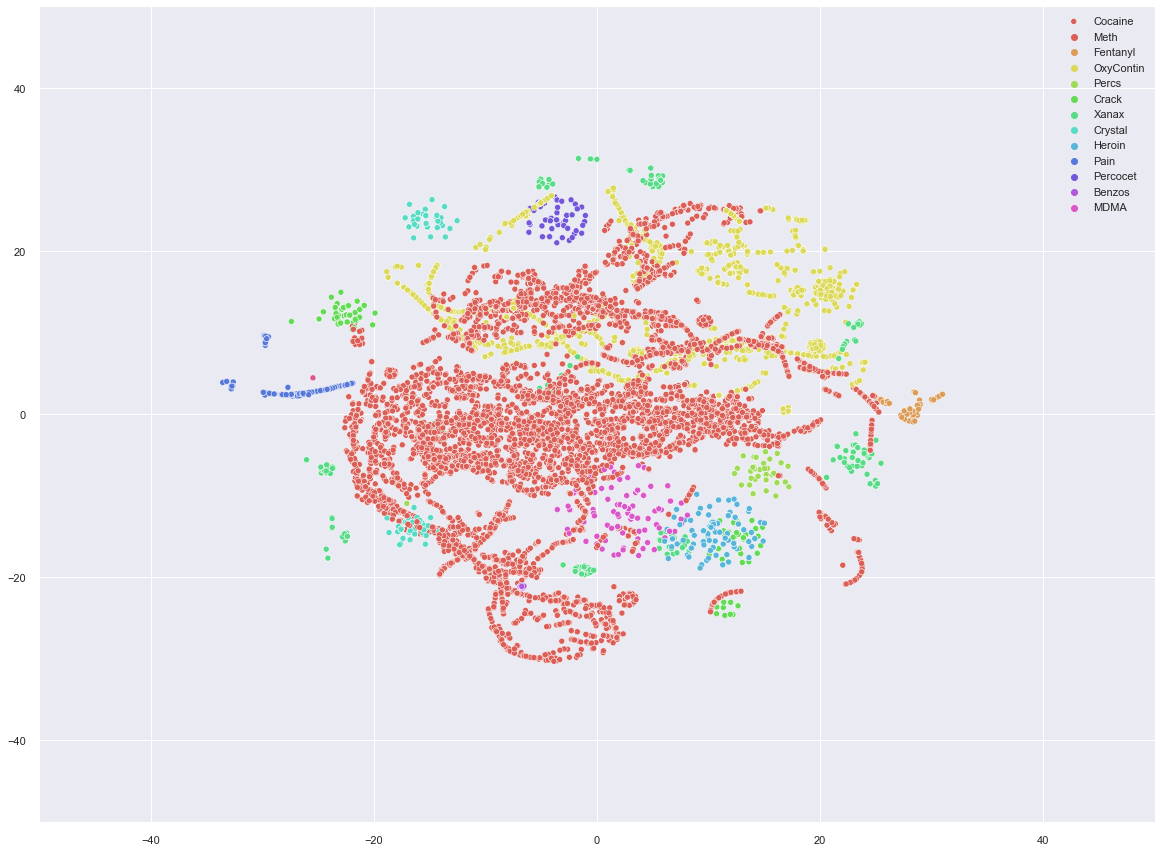

In [45]:
my_palette = sns.hls_palette(n_colors=13)
sns.set_theme()
sns.set(rc={'figure.figsize':(20, 15)})
plt.xlim(-50,50)
plt.ylim(-50,50)
sns.scatterplot(x=visual[:,0], y=visual[:,1], palette=my_palette, hue=clusters)
plt.legend(labels=["Cocaine", "Meth", "Fentanyl","OxyContin",
                   "Percs", "Crack", "Xanax", "Crystal", "Heroin", "Pain",
                  "Percocet", "Benzos","MDMA"                  
                         
                  ])

Agglomerative clustering is another form of hierarchical clustering. With this approach each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. Cocaine forms the most cluster, heroin, pain, Oxycontin clusters are all grouped together

#### K-Means Clustering:
K-Means clustering is a method of vector quantization popular with cluster analysis in data mining. Here, I attempt to partition the observations into clusters with each observation belonging to the cluster with the nearest mean, serving as a prototype for the cluster. While the Elbow method is usually used to estimate the number of clusters to consider for the k-means approach, it is a heuristic technique and can be ambiguous, hence not reliable. As such, I used the Silhouette method and chose 10 clusters. 


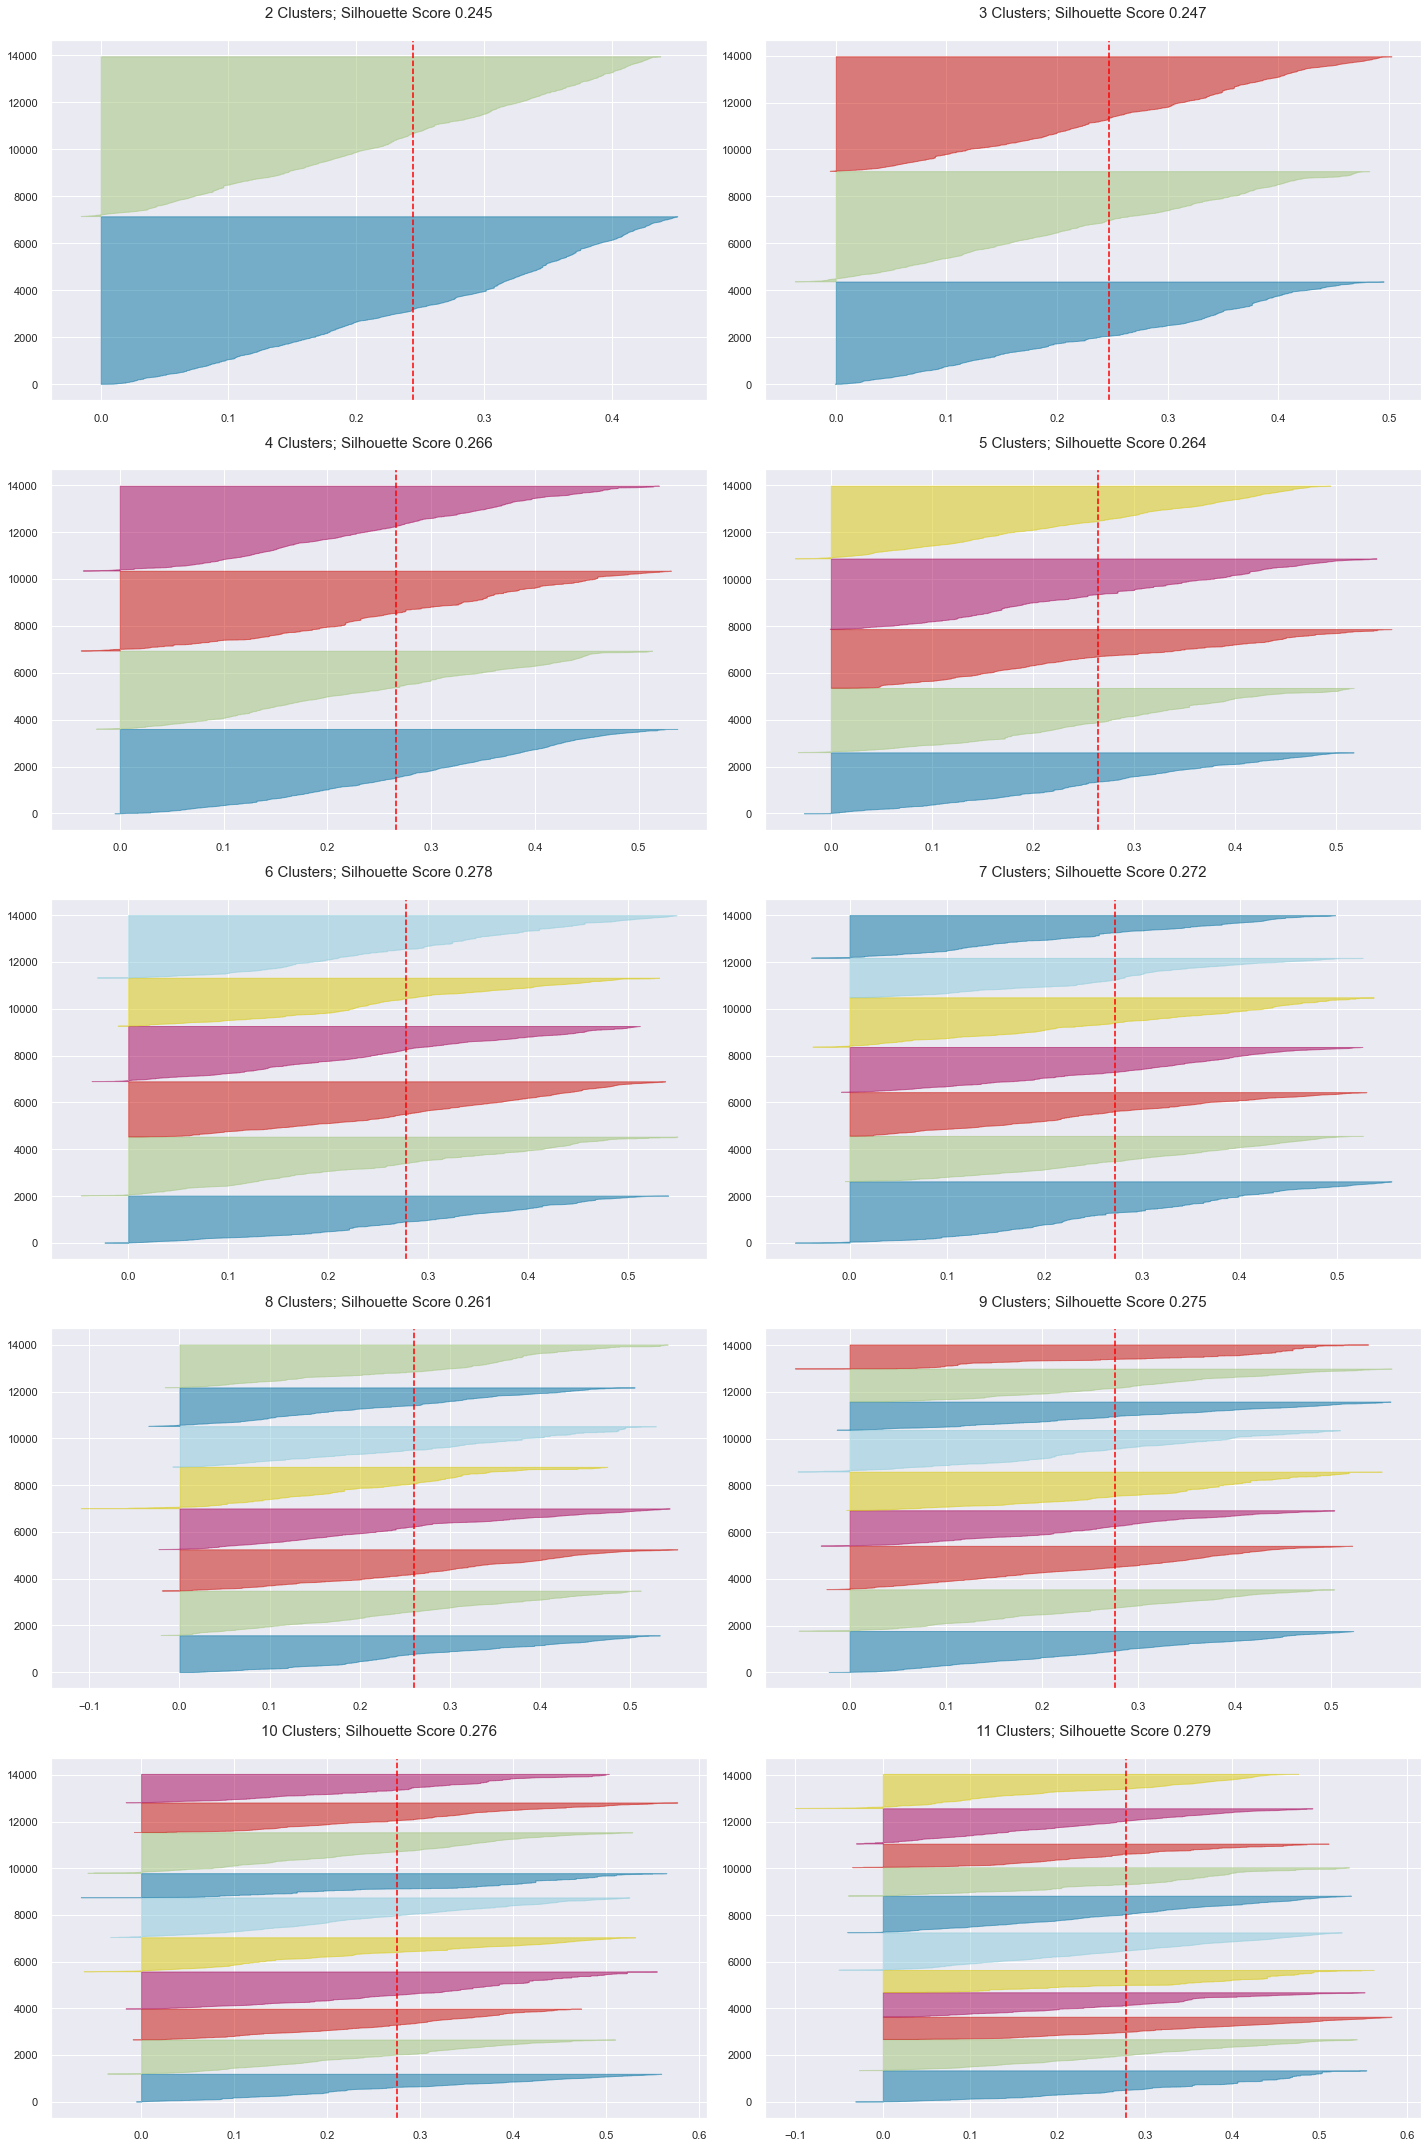

In [46]:
fig, ax = plt.subplots(5, 2, figsize=(20,30))

for i in range(2,12):

    kmeans = KMeans(n_clusters=i, random_state=0)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmeans, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(visual)
    
    sil_score = visualizer.silhouette_score_
    visualizer.ax.set_title(f"{i} Clusters; Silhouette Score {(visualizer.silhouette_score_):.3f}\n", 
                           fontsize=15)
    

fig.tight_layout()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13941 samples in 0.028s...
[t-SNE] Computed neighbors for 13941 samples in 0.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13941
[t-SNE] Computed conditional probabilities for sample 2000 / 13941
[t-SNE] Computed conditional probabilities for sample 3000 / 13941
[t-SNE] Computed conditional probabilities for sample 4000 / 13941
[t-SNE] Computed conditional probabilities for sample 5000 / 13941
[t-SNE] Computed conditional probabilities for sample 6000 / 13941
[t-SNE] Computed conditional probabilities for sample 7000 / 13941
[t-SNE] Computed conditional probabilities for sample 8000 / 13941
[t-SNE] Computed conditional probabilities for sample 9000 / 13941
[t-SNE] Computed conditional probabilities for sample 10000 / 13941
[t-SNE] Computed conditional probabilities for sample 11000 / 13941
[t-SNE] Computed conditional probabilities for sample 12000 / 13941
[t-SNE] Computed conditional probabilities for sam

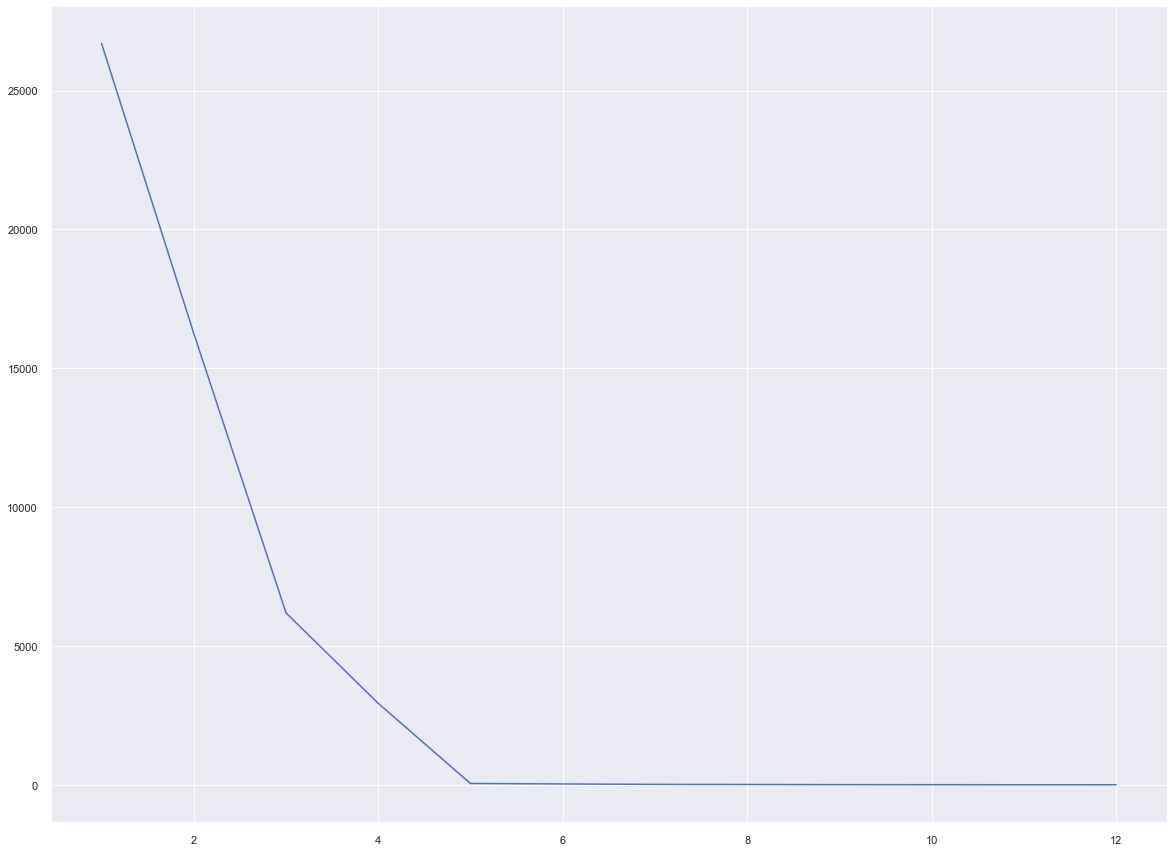

In [47]:
distortions =[]
K = range(1, 13)
for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=42).fit(D_pca)
    kmeans.fit(D_pca)
    distortions.append(kmeans.inertia_)



clusters = kmeans.fit_predict(D_pca)
plt.plot(K, distortions, 'bx-')

kmeans = KMeans(n_clusters=10, random_state=42).fit(D_pca)
tsne = TSNE(n_components=3, verbose=1)
visual = tsne.fit_transform(D_pca)

<AxesSubplot:ylabel='count'>

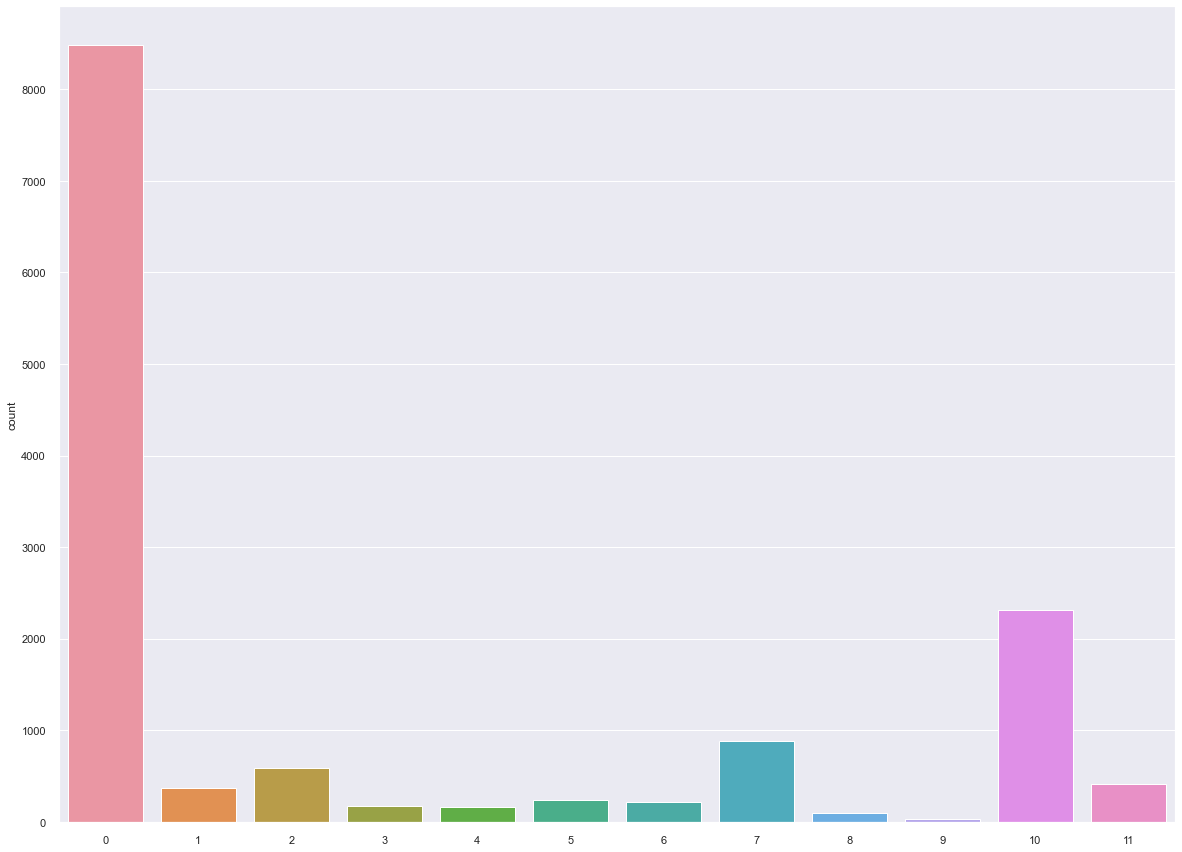

In [48]:
sns.countplot(clusters)

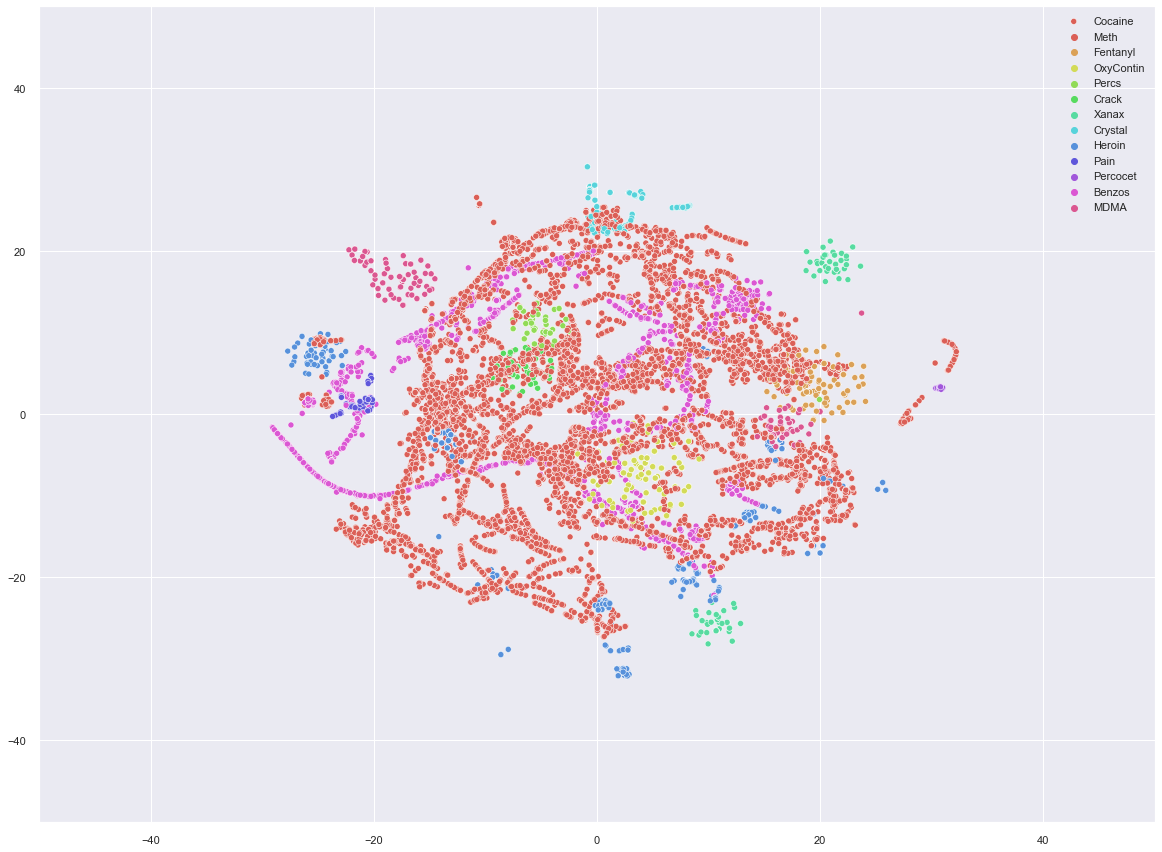

In [49]:
my_palette = sns.hls_palette(n_colors=12)
sns.set_theme()
sns.set(rc={'figure.figsize':(20, 15)})
plt.xlim(-50,50)
plt.ylim(-50,50)
sns.scatterplot(x=visual[:,0], y=visual[:,1], palette=my_palette, hue=clusters)
plt.legend(labels=["Cocaine", "Meth", "Fentanyl","OxyContin",
                   "Percs", "Crack", "Xanax", "Crystal", "Heroin", "Pain",
                  "Percocet", "Benzos","MDMA"                       
                  ])

The overall objective of K-means here is simple: to group similar data points together and discover underlying patterns. Tweets collected on drugs are dominated by cocaine and meth as seen above, with fentanyl and oxycodone grouped within conversations had along the lines of cocaine and meth. Benzos and MDMAs are clustered separately and across

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

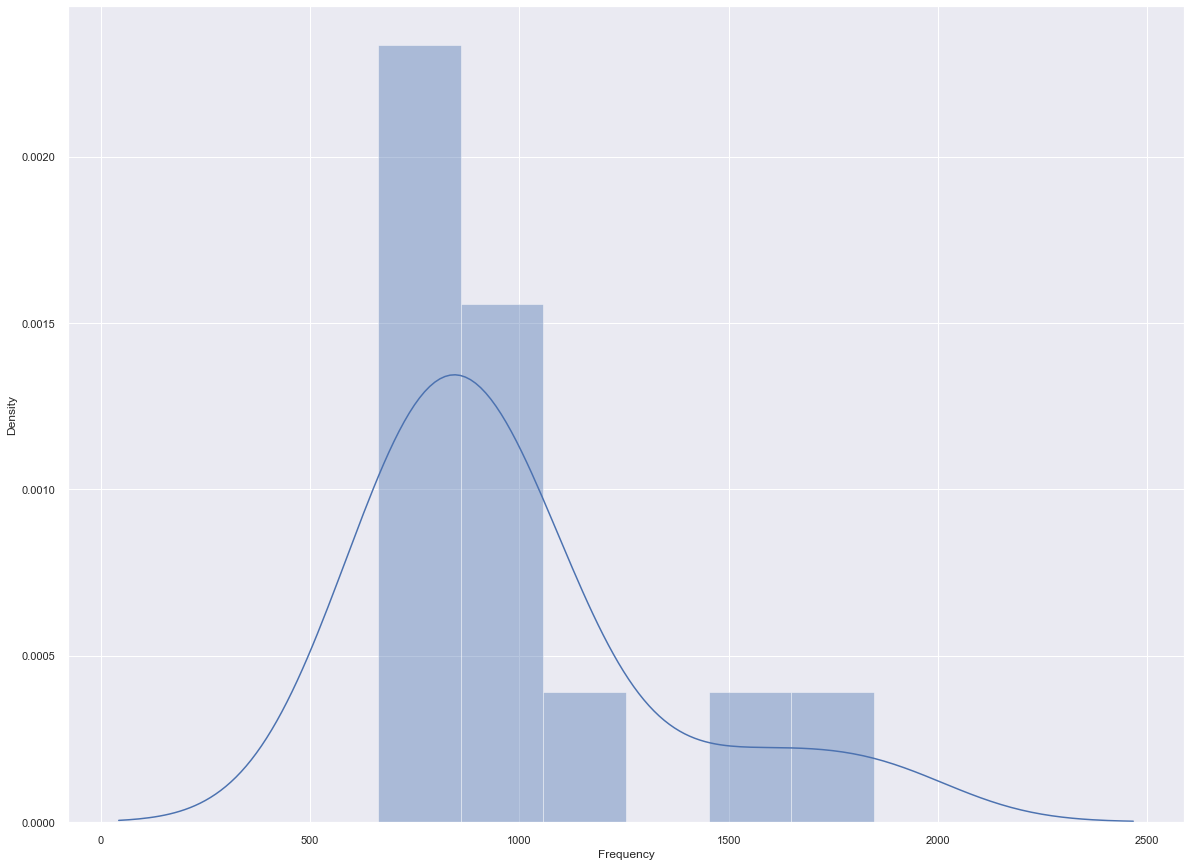

In [50]:
sns.distplot(word_frequency['Frequency'])

## Time Series Forecasting

Time series predictions for 2022 is made below using the SARIMAX model. This model is similar to the commonly used ARIMA and stands for Seasonal Auto Regressive Integrated Moving Average with exogenous factors. In an auto regressive (AR) model the model predicts the next data point by looking at previous data points and using a mathematical formula similar to linear regression. Auto Arima is used to determine the p,q,d parameters (p is the order of the AR term, q is the order of the MA term and d is the number of differencing required to make the time series stationary). It finds all possible combinations of the parameters and chooses the best model with the least AIC (Akaike Information Critera). 

All the drug classes are considered based on historical time stamped data collected from the CDC. The blue line in each plot is the trend of drug overdose from 1999-2019 and the orange line is the forecast for 2022. 

#### OXYCODONE

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -159.309
Date:                Wed, 15 Dec 2021   AIC                            322.619
Time:                        11:52:06   BIC                            324.610
Sample:                    01-01-1999   HQIC                           323.008
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8289      0.142      5.842      0.000       0.551       1.107
sigma2      4.543e+05   1.47e+05      3.084      0.002    1.66e+05    7.43e+05
Ljung-Box (L1) (Q):                   0.11   Jarque-

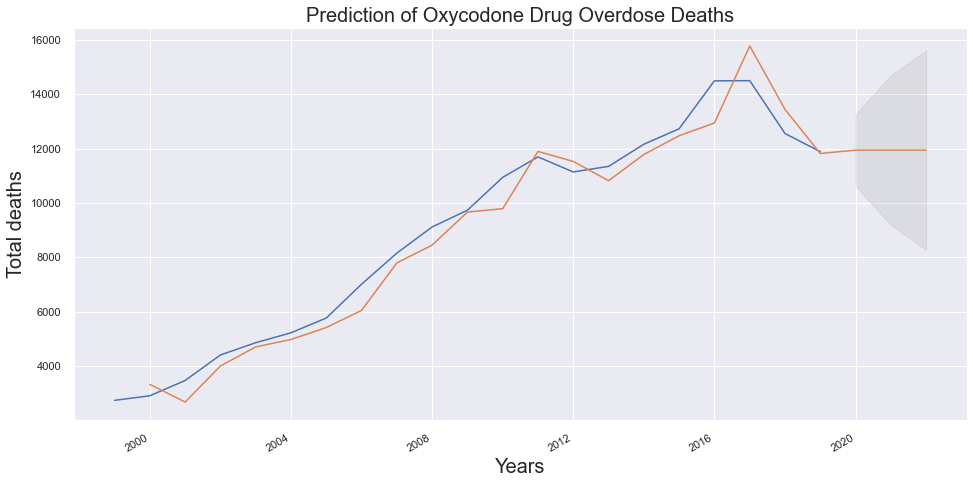

In [51]:
Oxycodone = overdose1[overdose1.Drug_type == "Oxycodone"]
Oxycodone = pd.DataFrame(Oxycodone.groupby("Year")["Total_deaths"].sum())
Oxycodone["Total_deaths"] = Oxycodone.Total_deaths.astype("float32")
model_order = auto_arima(Oxycodone, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Oxycodone, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Oxycodone), label = 'passengers')
plt.title("Prediction of Oxycodone Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

The plot above describes the forecast of Oxycodone for 2022, maintaining the trend from 2019 through 2020 to 2022. The hard data suggests that there will be 12,000 total deaths due to Oxycodone. 

#### FENTANYL

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -172.777
Date:                Wed, 15 Dec 2021   AIC                            347.555
Time:                        11:52:07   BIC                            348.499
Sample:                    01-01-1999   HQIC                           347.715
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.594e+06   8.93e+05      5.143      0.000    2.84e+06    6.34e+06
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                12.28
Prob(Q):                              0.89   Pr

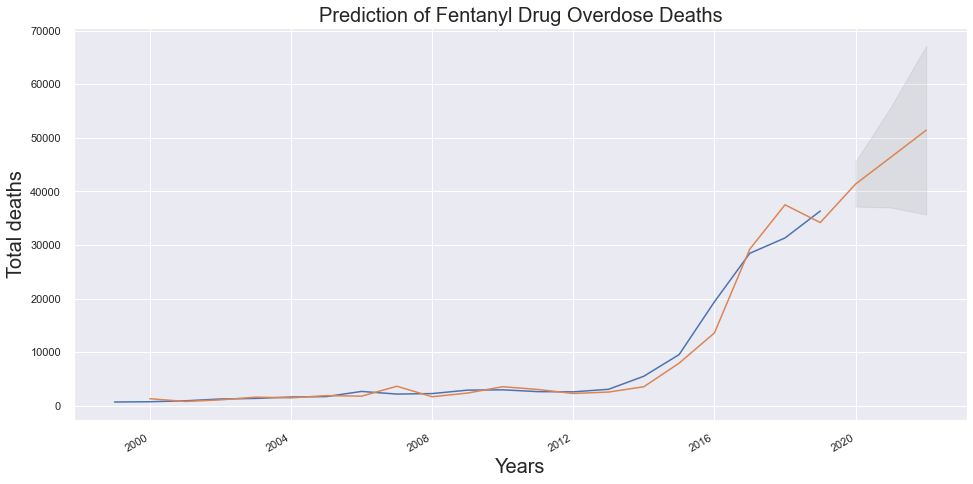

In [52]:
Fentanyl = overdose1[overdose1.Drug_type == "Fentanyl"]
Fentanyl = pd.DataFrame(Fentanyl.groupby("Year")["Total_deaths"].sum())
Fentanyl["Total_deaths"] = Fentanyl.Total_deaths.astype("float32")
model_order = auto_arima(Fentanyl, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Fentanyl, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Fentanyl), label = 'passengers')
plt.title("Prediction of Fentanyl Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

Fentanyl cases are on the rise from 2020 according to the collected data. Forecast indicates that the rise continues into 2022, with fentanyl recording around 50,000 drug overdose casualties. A significant increase from the mid-40,000 cases of 2019. 

#### METHADONE

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -150.369
Date:                Wed, 15 Dec 2021   AIC                            308.737
Time:                        11:52:08   BIC                            312.915
Sample:                    01-01-1999   HQIC                           309.644
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3177.1755    502.155      6.327      0.000    2192.970    4161.381
ar.L1          1.6859      0.110     15.347      0.000       1.471       1.901
ar.L2         -0.7930      0.115     -6.876      0.0

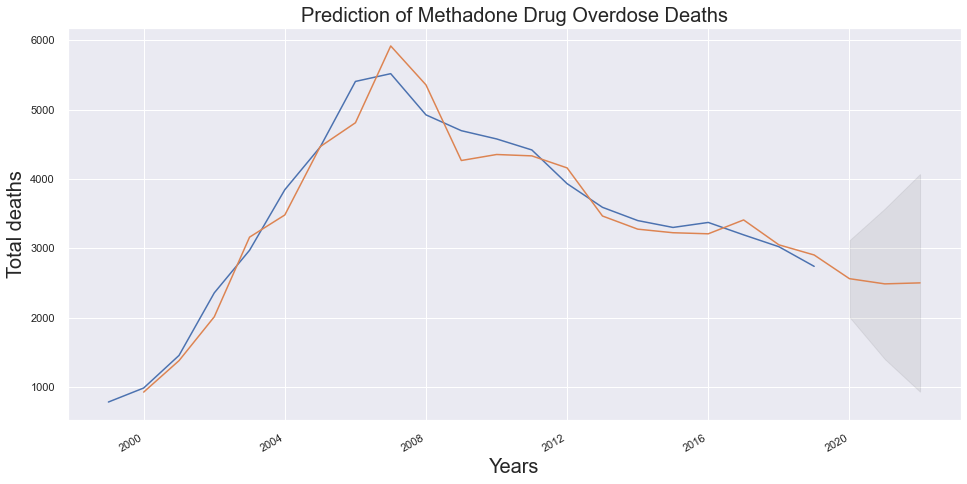

In [53]:
Methadone = overdose1[overdose1.Drug_type == "Methadone"]
Methadone = pd.DataFrame(Methadone.groupby("Year")["Total_deaths"].sum())
Methadone["Total_deaths"] = Methadone.Total_deaths.astype("float32")
model_order = auto_arima(Methadone, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Methadone, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Methadone), label = 'passengers')
plt.title("Prediction of Methadone Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

Methadone is originally meant for treatment of drug addiction has been abused over the years, reaching a peak of 5,500 overdose cases in 2007. The current trend has been downward and continues into 2022, bottoming out around 2500 overdose deaths. 

#### BENZODIAZEPINES

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -153.770
Date:                Wed, 15 Dec 2021   AIC                            311.540
Time:                        11:52:08   BIC                            313.532
Sample:                    01-01-1999   HQIC                           311.929
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8275      0.228      3.628      0.000       0.381       1.275
sigma2      2.674e+05   6.58e+04      4.063      0.000    1.38e+05    3.96e+05
Ljung-Box (L1) (Q):                   0.23   Jarque-

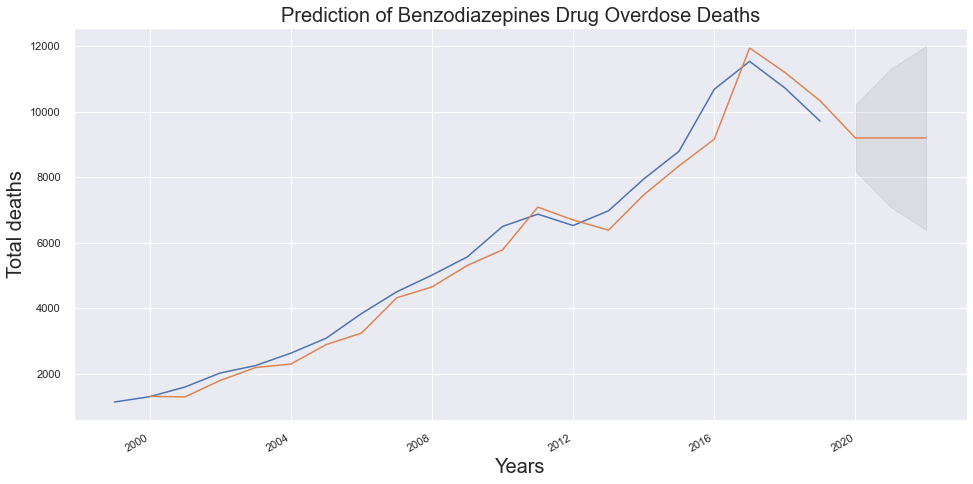

In [54]:
Benzodiazepines = overdose1[overdose1.Drug_type == "Benzodiazepines"]
Benzodiazepines = pd.DataFrame(Benzodiazepines.groupby("Year")["Total_deaths"].sum())
Benzodiazepines["Total_deaths"] = Benzodiazepines.Total_deaths.astype("float32")
model_order = auto_arima(Benzodiazepines, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Benzodiazepines, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Benzodiazepines), label = 'passengers')
plt.title("Prediction of Benzodiazepines Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

While it appears Benzodiazepines is on a downward trend from 2019, it actually plateaus out at just under 10,000 drug overdose deaths in 2022. 

#### METHAMPHETAMINE

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(1, 3, 1)   Log Likelihood                -131.794
Date:                Wed, 15 Dec 2021   AIC                            269.588
Time:                        11:52:09   BIC                            272.259
Sample:                    01-01-1999   HQIC                           269.956
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7862      0.241     -3.264      0.001      -1.258      -0.314
ma.L1         -0.5485      0.184     -2.980      0.003      -0.909      -0.188
sigma2      1.277e+05   5.56e+04      2.297      0.0

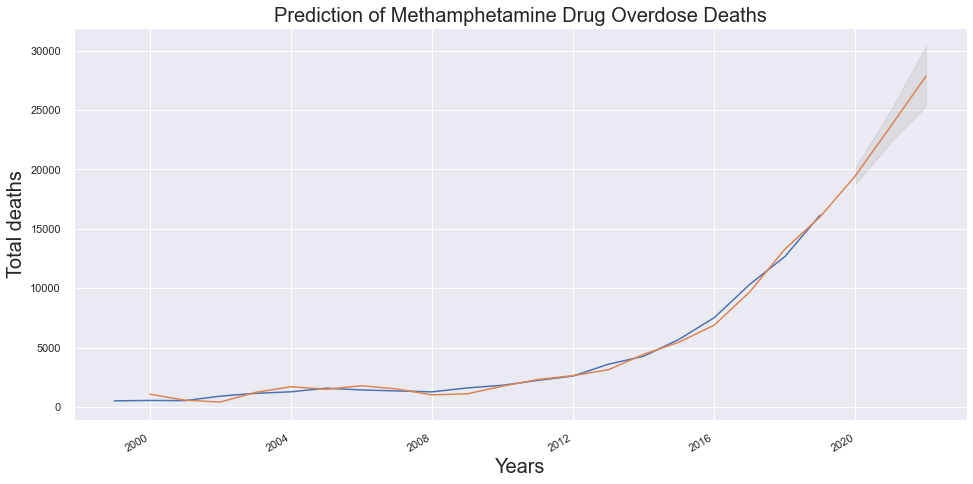

In [55]:
Methamphetamine = overdose1[overdose1.Drug_type == "Methamphetamine"]
Methamphetamine = pd.DataFrame(Methamphetamine.groupby("Year")["Total_deaths"].sum())
Methamphetamine["Total_deaths"] = Methamphetamine.Total_deaths.astype("float32")
model_order = auto_arima(Methamphetamine, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Methamphetamine, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Methamphetamine), label = 'passengers')
plt.title("Prediction of Methamphetamine Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

Methamphetamine (Meth) maintains its upward climb from 2012, increasing from the actual overdose numbers of over 15,000 deaths in 2019 to nearly 30,000 deaths in 2022. It represents the highest increase in drug overdose deaths seen in this project.

#### COCAINE

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -167.788
Date:                Wed, 15 Dec 2021   AIC                            339.576
Time:                        11:52:10   BIC                            341.568
Sample:                    01-01-1999   HQIC                           339.965
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7482      0.182      4.108      0.000       0.391       1.105
sigma2      1.017e+06   3.92e+05      2.597      0.009    2.49e+05    1.79e+06
Ljung-Box (L1) (Q):                   0.12   Jarque-

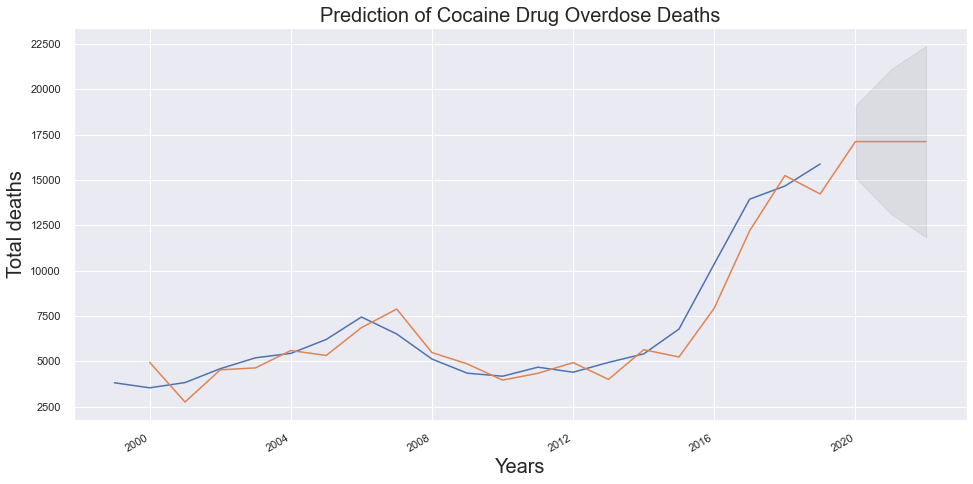

In [56]:
Cocaine = overdose1[overdose1.Drug_type == "Cocaine"]
Cocaine = pd.DataFrame(Cocaine.groupby("Year")["Total_deaths"].sum())
Cocaine["Total_deaths"] = Cocaine.Total_deaths.astype("float32")
model_order = auto_arima(Cocaine, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Cocaine, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Cocaine), label = 'passengers')
plt.title("Prediction of Cocaine Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

While experiencing a predicted sharp rise in 2020, the total cocaine casualties demonstrably flattens out across 17,500 drug overdose deaths in 2022. 

#### HEROIN

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -160.407
Date:                Wed, 15 Dec 2021   AIC                            324.814
Time:                        11:52:10   BIC                            326.805
Sample:                    01-01-1999   HQIC                           325.203
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7724      0.112      6.873      0.000       0.552       0.993
sigma2      5.221e+05    1.7e+05      3.075      0.002    1.89e+05    8.55e+05
Ljung-Box (L1) (Q):                   0.68   Jarque-

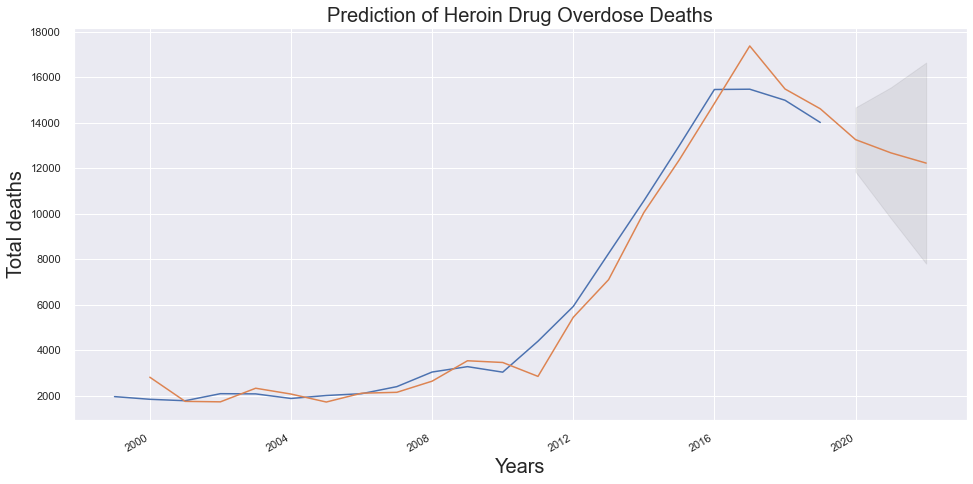

In [57]:
Heroin = overdose1[overdose1.Drug_type == "Heroin"]
Heroin = pd.DataFrame(Heroin.groupby("Year")["Total_deaths"].sum())
Heroin["Total_deaths"] = Heroin.Total_deaths.astype("float32")
model_order = auto_arima(Heroin, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Heroin, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Heroin), label = 'passengers')
plt.title("Prediction of Heroin Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

Heroin continues its descent in total drug overdose deaths in from 2016, further dropping to a predicted 12,000 deaths in 2022. The lowest it will be post-2016.   

#### CANNABIS

                               SARIMAX Results                                
Dep. Variable:           Total_deaths   No. Observations:                   21
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -94.802
Date:                Wed, 15 Dec 2021   AIC                            191.603
Time:                        11:52:11   BIC                            192.548
Sample:                    01-01-1999   HQIC                           191.763
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1262.6910    305.045      4.139      0.000     664.814    1860.568
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.42   Pr

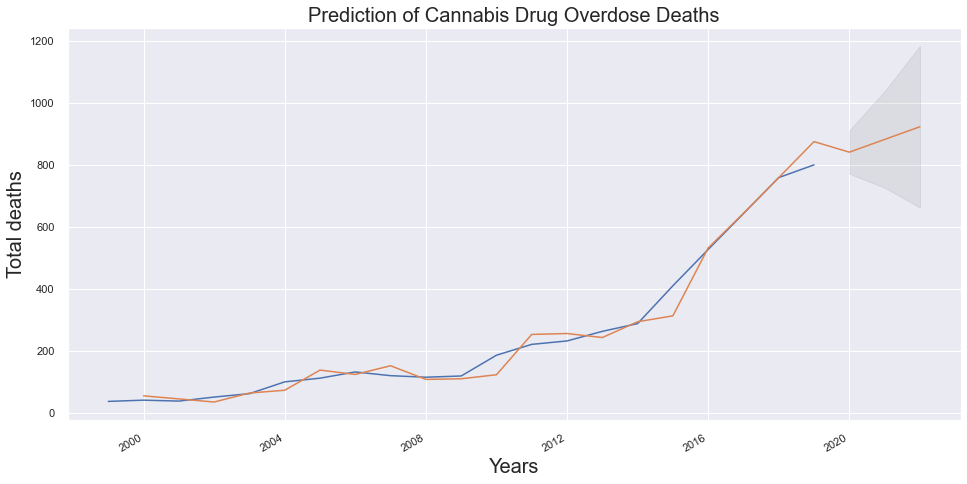

In [58]:
Cannabis = overdose1[overdose1.Drug_type == "Cannabis"]
Cannabis = pd.DataFrame(Cannabis.groupby("Year")["Total_deaths"].sum())
Cannabis["Total_deaths"] = Cannabis.Total_deaths.astype("float32")
model_order = auto_arima(Cannabis, start_p = 0, start_q = 0, start_d = 0, max_p =10, max_q =10, max_d=10)
model = ARIMA(Cannabis, order=model_order.order)
total_res = model.fit()
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots()
ax.plot((Cannabis), label = 'passengers')
plt.title("Prediction of Cannabis Drug Overdose Deaths", fontsize=20)
plt.ylabel("Total deaths",fontsize=20)
plt.xlabel("Years", fontsize=20)
total_res.predict("2000", "2022").plot(ax=ax, label="forecast")
forecast = total_res.get_forecast("2022").summary_frame()
ax.fill_between(forecast.index, forecast["mean_ci_lower"], forecast["mean_ci_upper"], 
               color="k", alpha=0.07, label = "95% CI");
print(total_res.summary())

Predictably, Cannabis maintains a number lesser than 1000 in 2022, consistent with the exploratory analysis carried out on the CDC drug overdose data. The deaths most associated with cannabis are often secondary and/or multiple causes. 

### Conclusion

In conclusion, this project examines the various trends seen in the total deaths due to drug overdoses over the last two decades in the US. Gender-based analysis indicates twice as many men died from drug overdoses than women over the 20-year period, furthermore, drug overdose deaths in the last 20 years indicate rampant Oxycodone casualties in both genders. The current Time series forecasts estimate **Fentanyl** will be the leading driver of drug overdose in 2022 causing nearly 50,000 deaths and Oxycodone falling behind to 12,000 deaths.  
As is with the analysed tweets, the popularity of Meth online is evident in its current usage. Having contributed to about 70,000 deaths in the analysed data since 1999, it is on track to hit 25,000 casualties in 2022. As the conversations surrounding this illicit drug is widely rampant online, the time series forecast corroborates the twitter popularity.

This project essentially demonstrates the current opioid crisis in the US as oxycodone(including percocets) - a semisynthetic opioid, fentanyl - an opioid analgesic have been the major contributory drivers to drug overdose and will be the leading factors in 2022. Cocaine remains in the conversation online as it has always been, maintaining a forecasted 17,500 casualties in 2022. 


#### What's Next?
Considerations for a python script that ports into a static website to tell what illicit toxic drugs are trending could be a measure for knowing what to expect regarding the drugs most likely to cause overdose for the next decade. 